In [58]:
# import the packages needed, the latest data and understanding the columns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
from scipy.interpolate import spline
from IPython.display import YouTubeVideo


# import the data
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-28.xlsx'
df = pd.read_excel(url, sheet_name=0, header=0, index_col=0)
list_columns = df.columns.values
print(list_columns)
df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)
df.head(5)

# extract countries
df_china = df[df['country'] == 'China']
df_france = df[df['country'] == 'France']
df_italy = df[df['country'] == 'Italy']
df_spain = df[df['country'] == 'Spain']
df_usa = df[df['countryterritoryCode'] == 'USA']
df_netherlands = df[df['country'] == 'Netherlands']
df_germany = df[df['country'] == 'Germany']
df_tunisia = df[df['country'] == 'Tunisia']
df_uk = df[df['geoId'] == 'UK']


# clean up data and outliers
print(df_china.loc['2020-02-14', 'cases'])
print(df_china.loc['2020-02-12', 'cases'])
df_china.loc['2020-02-13', 'cases'] = np.mean([4156, 2028])
print(df_china.loc['2020-02-14', 'deaths'])
print(df_china.loc['2020-02-13', 'deaths'])
df_china.loc['2020-02-13', 'deaths'] = np.mean([13, 254])
df_china.loc['2020-02-14', 'deaths'] = np.mean([13, 254])



['day' 'month' 'year' 'cases' 'deaths' 'countriesAndTerritories' 'geoId'
 'countryterritoryCode' 'popData2018']
dateRep
2020-02-14    4156
Name: cases, dtype: int64
dateRep
2020-02-12    2028
Name: cases, dtype: int64


/Users/lindseyholiday/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



dateRep
2020-02-14    13
Name: deaths, dtype: int64
dateRep
2020-02-13    254
Name: deaths, dtype: int64


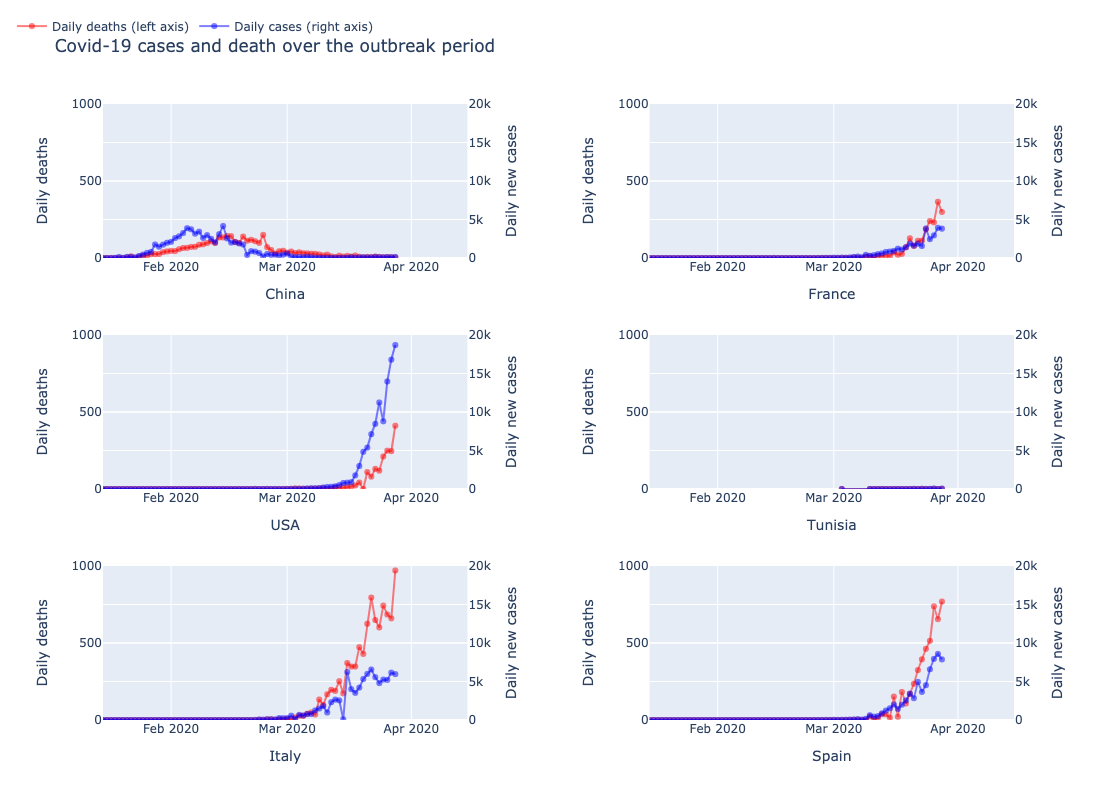

In [56]:



# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='lines+markers',
        name='Daily deaths (left axis)',
        line_color='rgba(256, 0, 0, .5)',
)
trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='lines+markers',
        name='Daily cases (right axis)',
        line_color='rgba(0, 0, 256, .5)',
        yaxis='y2'
)
trace3 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        showlegend=False,
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x2',
        yaxis='y3'
)
trace4 = go.Scatter(
        x=df_france.index, 
        y=df_france['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x2',
        yaxis='y4',
        showlegend=False,
)
trace5 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x3',
        yaxis='y5',
        showlegend=False,
)
trace6 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x3',
        yaxis='y6',
        showlegend=False,
)
trace7 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x4',
        yaxis='y7',
        showlegend=False,
)
trace8 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x4',
        yaxis='y8',
        showlegend=False,
)


trace9 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x5',
        yaxis='y9',
        showlegend=False,
)

trace10 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x5',
        yaxis='y10',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x6',
        yaxis='y11',
        showlegend=False,
)
trace12 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x6',
        yaxis='y12',
        showlegend=False,
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = go.Layout(
    title='Covid-19 cases and death over the outbreak period',
    legend=dict(x=-.1, y=1.15, orientation="h"), 
    width=1100,
    height=800,
    
    # Top left
    xaxis=dict(
        title='China',
        domain=[0, 0.4],
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,1000],
        domain=[0.75, 1],
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        #type='log',
        range=[0,20000],
        overlaying='y',
        side='right'
    ),
    

    # Top right
    xaxis2=dict(
        title='France',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y3'
    ),
    yaxis3=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.75, 1],
        anchor='x2',
        range=[0,1000],

    ),
    yaxis4=dict(
        title = 'Daily new cases',
        domain=[0.6, 1.0],
        overlaying='y3',
        range=[0,20000],
        side='right',
        anchor='x2'
    ),

    # middle left
    xaxis3=dict(
        title='USA',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 0.4],
        anchor='y5'
    ),
    yaxis5=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,1000],
        anchor='x3'
    ),
    yaxis6=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y5',
        range=[0,20000],
        side='right',
        anchor='x3'
    ),

    # middle right
    xaxis4=dict(
        title='Tunisia',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y7'
    ),
    yaxis7=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,1000],
        anchor='x4'
    ),
    yaxis8=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y7',
        range=[0,20000],
        side='right',
        anchor='x4'
    ),
    
    # Bottom left
    xaxis5=dict(
        title='Italy',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 0.4],
        anchor='y9'
    ),
    yaxis9=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1000],
        anchor='x5'
    ),
    yaxis10=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y9',
        range=[0,20000],
        side='right',
        anchor='x5'
    ),
    
    # Bottom bottom right
    xaxis6=dict(
        title='Spain',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y11'
    ),
    yaxis11=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1000],
        anchor='x6'
    ),
    yaxis12=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y11',
        range=[0,20000],
        side='right',
        anchor='x6'
    )
    
)
fig = go.Figure(data=data, layout=layout)


fig.show()





In [40]:
# function to smooth the data 

def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed


In [52]:
degree = 1
triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1]))
print(triangle)
range(degree, len(data) - degree * 2)

[0 1 0]


range(1, 6)

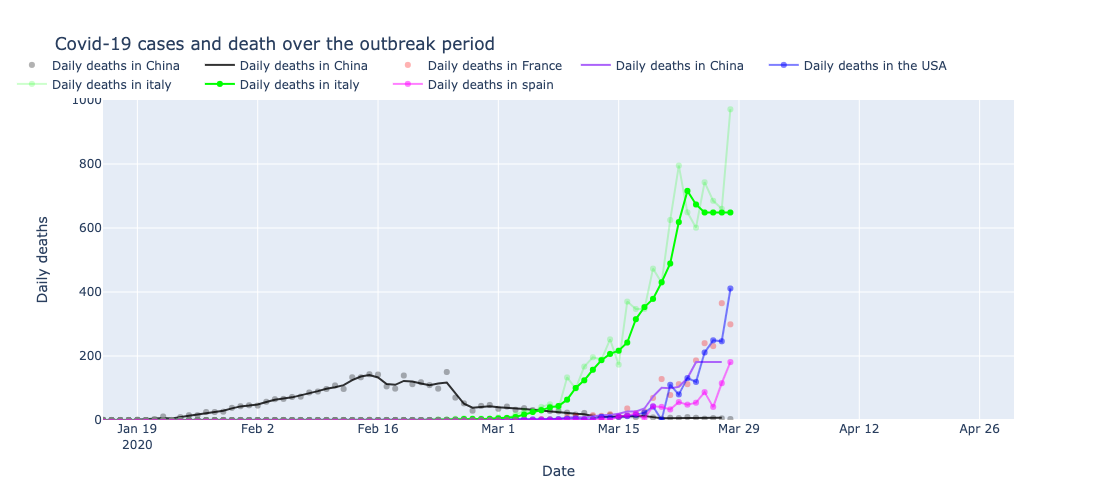

In [49]:



smooth_china = smoothTriangle(df_china['deaths'],1)
smooth_france = smoothTriangle(df_france['deaths'],1)
smooth_italy = smoothTriangle(df_italy['deaths'],1)


# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='markers',
        name='Daily deaths in China',
        line_color='rgba(0, 0, 0, .3)',
)

trace11 = go.Scatter(
        x=df_china.index[1:], 
        y=smooth_china[0:-1],
        mode='lines',
        name='Daily deaths in China',
        line_color='rgba(0, 0, 0, .8)',
)


trace2 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='markers',
        name='Daily deaths in France',
        line_color='rgba(256, 0, 0, .3)',
)

trace22 = go.Scatter(
        x=df_france.index[1:], 
        y=smooth_france[0:-1],
        mode='lines',
        name='Daily deaths in China',
        line_color='rgba(256, 0, 0, .)',
)


trace3 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='lines+markers',
        name='Daily deaths in the USA',
        line_color='rgba(0, 0, 256, .5)',
)

trace4 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='lines+markers',
        name='Daily deaths in italy',
        line_color='rgba(0, 256, 0, .2)',
)

trace44 = go.Scatter(
        x=df_italy.index, 
        y=smooth_italy,
        mode='lines+markers',
        name='Daily deaths in italy',
        line_color='rgba(0, 256, 0, 1)',
)

trace5 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='lines+markers',
        name='Daily deaths in spain',
        line_color='rgba(256, 0, 256, .5)',
)

trace5 = go.Scatter(
        x=df_uk.index, 
        y=df_uk['deaths'],
        mode='lines+markers',
        name='Daily deaths in spain',
        line_color='rgba(256, 0, 256, .5)',
)


data = [trace1,trace11, trace2, trace22, trace3,  trace4, trace44, trace5]

layout = go.Layout(
    title='Covid-19 cases and death over the outbreak period',
    legend=dict(x=-.1, y=1.155, orientation="h"), 
    width=1100,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-01-15', '2020-04-30'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,1000],
        anchor='x'
    ),
    
    
)
fig = go.Figure(data=data, layout=layout)


fig.show()


It seems to be an outlier on Feb 13th. with Feb 13th deaths too high and feb 14th too low. These two will be averaged

In [10]:
len(df_china)

89

In [102]:
def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed


/Users/lindseyholiday/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/lindseyholiday/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



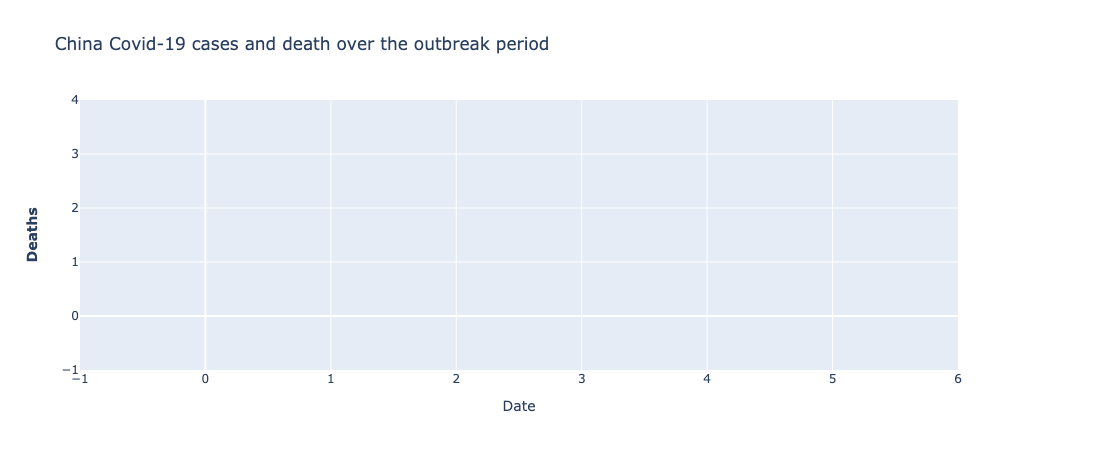

In [104]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
'''
fig.add_trace(go.Scatter(x=df_china.index, y=df_china['deaths'],
                    mode='markers',
                    name='Daily deaths in China (left axis)',
                    line_color='rgba(256, 0, 0, .5)'), 
                    secondary_y=False,)
'''

# Add traces
trace1 = go.Scatter(x=df_china.index, y=df_china['deaths'],
                    mode='markers',
                    name='Daily deaths in China (left axis)',
                    line_color='rgba(256, 0, 0, .5)')

trace1 = go.Scatter(x=df_china.index, y=df_china['deaths'],
                    mode='markers',
                    name='Daily deaths in China (left axis)',
                    line_color='rgba(256, 0, 0, .5)')

# Add figure title
fig.update_layout(
    title_text="China Covid-19 cases and death over the outbreak period"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Deaths</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Cases</b>", secondary_y=True)

fig.update_xaxes(range=['2020-01-01', '2020-05-15'])
#fig.update_yaxes(range=[0, 1000])

fig.show()

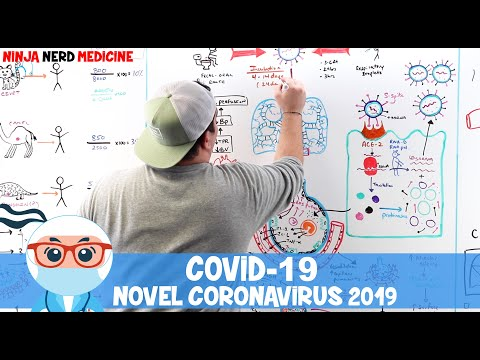

In [59]:
YouTubeVideo("PWzbArPgo-o")